In [1]:

import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages')
sys.path.append('/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/scalpy/')
sys.path.append('/home/aklantbhowmick/anaconda3/envs/nbodykit-env/lib/python3.6/site-packages/')
import mdot_to_Lbol
import arepo_package
import scipy.interpolate
radiative_efficiency=0.2
total_conv=mdot_to_Lbol.get_conversion_factor_arepo(radiative_efficiency)
import h5py
%pylab inline
import os
from multiprocessing import Pool

redshift_cut=6

import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

from scipy.integrate import quad
global c,h,omm,oml,omk
omk=0
oml=0.6911 
omm=0.3089
c=3*10**5
h=0.6771


def DC(z0, z1):
    # Comoving distance in Mpc                                                                                          $
    def integrand(z):
        return 1.0/E(z)
    return c/(100.0)*quad(integrand,z0,z1)[0]

def dx_dz(z):
    # Comoving distance in Mpc                                                                                          $
    def integrand(z):
        return 1.0/E(z)
    return c/(100.0)*integrand(z)


def E(z):
        #normalized hubble parameter                                                                                    $
    return np.sqrt(omm*(1.0+z)**3 + oml + omk*(1.0+z)**2)

def DL(z):
    #Luminosity distance in Mpcs                                                                                        $
    return (1.0+z)*DC(0,z)

def DM(z):
        #Distance Modulus                                                                                               $
        return 5*np.log10((DL(z)*1e6)/10.0)

def mtoM(m,z):
    return m - DM(z) - K(z)

def Mtom(M, z):
    return M + DM(z) + K(z)

def LtoM(L):
    M = -2.5 * np.log10(L*1e-7)+34.1
    return M

def MtoL(M):
    return 10**((-1/2.5*(M-34.1)))*1e7

def K(z):
    #K correction, assuming same filter size in emitted and observed frame                                              $
    return 2.5*np.log10(1.0/(1+z))

def T(z0,z1):
    sectoyrs=3.171e-08
    Mpctokm=3.0857E+19
    def integrand(z):
        return 1.0/E(z)/(1+z)
    return 1./(100.0)*quad(integrand,z0,z1)[0]*Mpctokm*sectoyrs/0.7


Populating the interactive namespace from numpy and matplotlib


In [2]:
def show_seeding_histories2(basePath,col,labl='.',width=4,style='solid',nbins=40,cumulative=0,plot=1):
    #nbins=40
    scale_fac_complete2,BH_id_complete2,density_complete2,metallicity_complete2,SFR_complete2,FOFDMmass_complete2,indexmaxdens_complete2,file_id_complete2,FOFStarFormingGasMass_complete2,FOFStarFormingGasMetallicity_complete2,N_empty=arepo_package.get_seeding_events2(basePath)
    redshifts_fac=1./scale_fac_complete2-1
    print("No of seeds formed:", len(redshifts_fac[redshifts_fac>11]))
    obj=ax
    seed_redshifts=1./scale_fac_complete2-1.
    mask=(seed_redshifts>redshift_cut)
    M,MF,dMF=get_distribution(seed_redshifts[mask],nbins,redshift_cut,30,linear=1,cumulative=cumulative)
    if (plot==1):
        obj.errorbar(M[MF>0],MF[MF>0],dMF[MF>0],color=col,linewidth=width,label=labl,linestyle=style)
        obj.set_ylim(0.9,1e3)
    #    obj.set_xlabel('Seeding redshift',fontsize=30)
    #    obj.set_ylabel('No. of seeding events',fontsize=30)
    #    obj.tick_params(labelsize=30)
        obj.set_yscale('log')
    return M,MF,dMF


def show_seed_FOFmass(basePath,col,labl='.',width=4,style='solid',nbins=40,cumulative=0,plot=1):
    #nbins=40
    scale_fac_complete2,BH_id_complete2,density_complete2,metallicity_complete2,SFR_complete2,FOFDMmass_complete2,indexmaxdens_complete2,file_id_complete2,FOFStarFormingGasMass_complete2,FOFStarFormingGasMetallicity_complete2,N_empty=arepo_package.get_seeding_events2(basePath)
    redshifts_fac=1./scale_fac_complete2-1
    print("No of seeds formed:", len(redshifts_fac[redshifts_fac>11]))
    obj=ax
    seed_redshifts=1./scale_fac_complete2-1.
    mask=(seed_redshifts>redshift_cut)
    M,MF,dMF=get_distribution(numpy.log10(FOFDMmass_complete2[mask]*1e10),nbins,3,13,linear=1,cumulative=cumulative)
    if (plot==1):
        obj.errorbar(M[MF>0],MF[MF>0],dMF[MF>0],color=col,linewidth=width,label=labl,linestyle=style)
        #obj.set_ylim(0.9,1e3)

        obj.set_yscale('log')
    return M,MF,dMF


def get_distribution(HM,Nbins,log_HM_min,log_HM_max,linear=0,cumulative=0):
    #print(HM)
    
    def extract(HM_min,HM_max):
        if (cumulative==1):
            mask=(HM>HM_min)
        else:
            mask=(HM>HM_min)&(HM<HM_max)
        return (HM_min+HM_max)/2,len(HM[mask])
    if (linear):
        HM_bin=numpy.linspace(log_HM_min,log_HM_max,Nbins,endpoint=True)
    else:
        HM_bin=numpy.logspace(log_HM_min,log_HM_max,Nbins,endpoint=True)
    out=[extract(HM_bin[i],HM_bin[i+1]) for i in range(0,len(HM_bin)-1)]
    #return out
    centers=numpy.array(list(zip(*out))[0])
    counts=numpy.array(list(zip(*out))[1])
    HMF=counts
    dHMF=numpy.sqrt(counts)
    norm=1.#sum(HMF)
    return centers,HMF/norm,dHMF/norm


tick_fontsize=30
label_fontsize=30
legend_fontsize=20
title_fontsize=40

def set_default_fontsizes(obj,xlabl,ylabl):
    obj.tick_params(labelsize=tick_fontsize)
    obj.set_xlabel(xlabl,fontsize=label_fontsize)
    obj.set_ylabel(ylabl,fontsize=label_fontsize)
    
def set_legend(obj,location,fs=legend_fontsize):
    obj.legend(loc=location,frameon=False,fontsize=fs)

No of seeds formed: 21
No of seeds formed: 20
No of seeds formed: 20


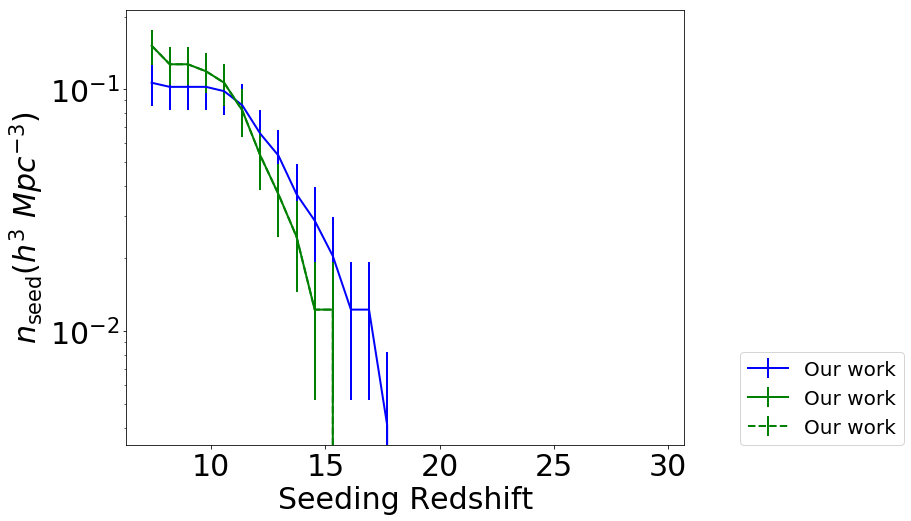

In [6]:
f,axx=plt.subplots(1,1,figsize=(10,8),sharex=True)


ax=axx
nbins=30

redshift_cut=7
text_fontsize=25


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run

run='/L3p125n512/AREPO/' # name of the simulation runs
output='/output_ratio3000_SFMFGM1000_seed3.19/'   
basePath=path_to_output+run+output
col='red'
fac=1./6.25**3
M10,MF10,dMF10=show_seeding_histories2(basePath,col,labl=r"$M_{seed}=1.95e2 \ M_{\odot}/h$",nbins=nbins,cumulative=1,plot=0)
ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=2,color='blue',label='Our work')

run='/L3p125n512/AREPO/' # name of the simulation runs
output='/output_ratio3000_SFMFGM5_SFGM3000_seed3.19/'   
basePath=path_to_output+run+output
col='red'
fac=1./6.25**3
M10,MF10,dMF10=show_seeding_histories2(basePath,col,labl=r"$M_{seed}=1.95e2 \ M_{\odot}/h$",nbins=nbins,cumulative=1,plot=0)
ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=2,color='green',label='Our work')




run='/L3p125n512/AREPO/' # name of the simulation runs
output='/output_ratio10000_SFMFGM5_SFGM3000_seed3.19/'   
basePath=path_to_output+run+output
col='red'
fac=1./6.25**3
M10,MF10,dMF10=show_seeding_histories2(basePath,col,labl=r"$M_{seed}=1.95e2 \ M_{\odot}/h$",nbins=nbins,cumulative=1,plot=0)
ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=2,color='green',label='Our work',linestyle='dashed')




ax.legend(loc=(1.1,0),fontsize=20)

plt.subplots_adjust(wspace=0,hspace=0)

set_default_fontsizes(axx,'Seeding Redshift',r'$n_{\mathrm{seed}}(h^3 \ Mpc^{-3})$')

#ax.set_ylim(1,1e5)
ax.set_yscale('log')

plt.subplots_adjust(wspace=0,hspace=0)

#plt.savefig('Seeding_distribution_resolution_convergence.png',bbox_inches='tight')

#-----------------------------------------



No of seeds formed: 238
No of seeds formed: 212
No of seeds formed: 1


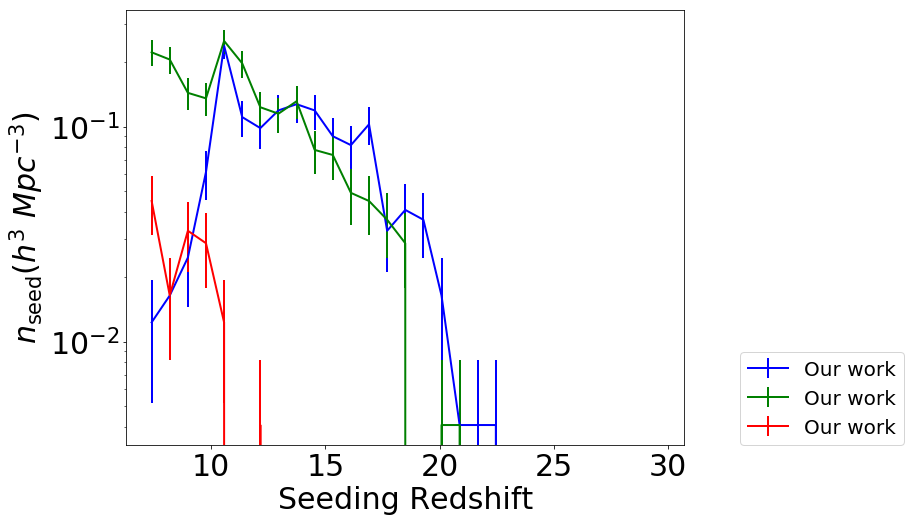

In [5]:
f,axx=plt.subplots(1,1,figsize=(10,8),sharex=True)


ax=axx
nbins=30

redshift_cut=7
text_fontsize=25


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run

run='/L6p25n1024/AREPO/' # name of the simulation runs
output='/output_ratio3000_SFMFGM1000_seed3.19/'   
basePath=path_to_output+run+output
col='red'
fac=1./6.25**3
M10,MF10,dMF10=show_seeding_histories2(basePath,col,labl=r"$M_{seed}=1.95e2 \ M_{\odot}/h$",nbins=nbins,cumulative=0,plot=0)
ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=2,color='blue',label='Our work')



run='/L6p25n1024/AREPO/' # name of the simulation runs
output='/output_ratio10000_SFMFGM5_SFGM3000_Z1_seed3.19/'   
basePath=path_to_output+run+output
col='red'
fac=1./6.25**3
M10,MF10,dMF10=show_seeding_histories2(basePath,col,labl=r"$M_{seed}=1.95e2 \ M_{\odot}/h$",nbins=nbins,cumulative=0,plot=0)
ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=2,color='green',label='Our work')



path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS/GAS_GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run


run='/L6p25N1024/AREPO/' # name of the simulation runs
output='/output_ratio10000_SFMFGM5_SFGM3000_Z1_seed4.10/'   
basePath=path_to_output+run+output
col='red'
fac=1./6.25**3
M10,MF10,dMF10=show_seeding_histories2(basePath,col,labl=r"$M_{seed}=1.95e2 \ M_{\odot}/h$",nbins=nbins,cumulative=0,plot=0)
ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=2,color='red',label='Our work')







ax.legend(loc=(1.1,0),fontsize=20)

plt.subplots_adjust(wspace=0,hspace=0)

set_default_fontsizes(axx,'Seeding Redshift',r'$n_{\mathrm{seed}}(h^3 \ Mpc^{-3})$')

#ax.set_ylim(1,1e5)
ax.set_yscale('log')

plt.subplots_adjust(wspace=0,hspace=0)

#plt.savefig('Seeding_distribution_resolution_convergence.png',bbox_inches='tight')

#-----------------------------------------



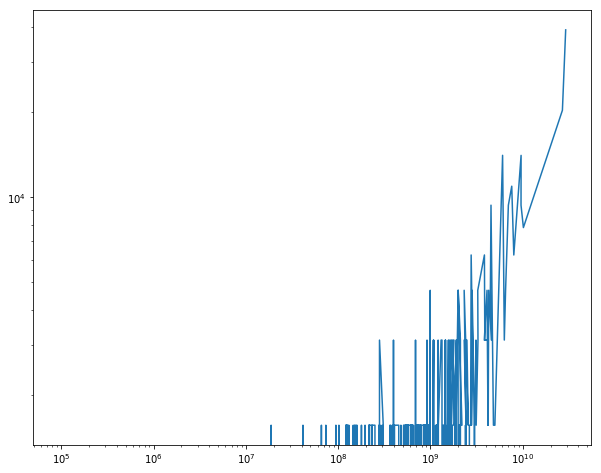

In [12]:
f,axx=plt.subplots(1,1,figsize=(10,8),sharex=True)



path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run

run='/L6p25n1024/AREPO/' # name of the simulation runs
output='/output_ratio3000_SFMFGM1000_seed3.19/'   
basePath=path_to_output+run+output

GroupBHMass,o=arepo_package.get_group_property(basePath,'GroupBHMass',7)

GroupMass,o=arepo_package.get_group_property(basePath,'GroupMass',7)
axx.errorbar(GroupMass*1e10,GroupBHMass*1e10)

axx.set_yscale('log')

axx.set_xscale('log')



No of seeds formed: 3672
No of seeds formed: 21
No of seeds formed: 20


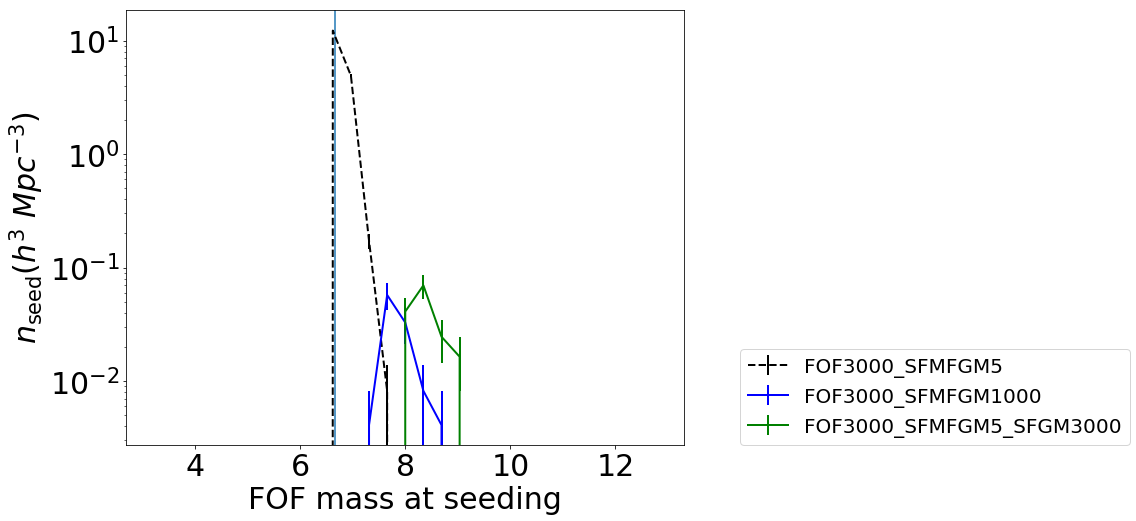

In [6]:
f,axx=plt.subplots(1,1,figsize=(10,8),sharex=True)


ax=axx
nbins=30

redshift_cut=7
text_fontsize=25


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run

run='/L3p125n512/AREPO/' # name of the simulation runs


output='/output_ratio3000_SFMFGM5_seed3.19/'   
basePath=path_to_output+run+output
col='red'
fac=1./6.25**3
M10,MF10,dMF10=show_seed_FOFmass(basePath,col,labl=r"$M_{seed}=1.95e2 \ M_{\odot}/h$",nbins=nbins,cumulative=0,plot=0)
ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=2,color='black',label='FOF3000_SFMFGM5',linestyle='dashed')



output='/output_ratio3000_SFMFGM1000_seed3.19/'   
basePath=path_to_output+run+output
col='red'
fac=1./6.25**3
M10,MF10,dMF10=show_seed_FOFmass(basePath,col,labl=r"$M_{seed}=1.95e2 \ M_{\odot}/h$",nbins=nbins,cumulative=0,plot=0)
ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=2,color='blue',label='FOF3000_SFMFGM1000')

run='/L3p125n512/AREPO/' # name of the simulation runs
output='/output_ratio3000_SFMFGM5_SFGM3000_seed3.19/'   
basePath=path_to_output+run+output
col='red'
fac=1./6.25**3
M10,MF10,dMF10=show_seed_FOFmass(basePath,col,labl=r"$M_{seed}=1.95e2 \ M_{\odot}/h$",nbins=nbins,cumulative=0,plot=0)
ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=2,color='green',label='FOF3000_SFMFGM5_SFGM3000')




ax.axvline(numpy.log10(1.56e3*3000))

ax.legend(loc=(1.1,0),fontsize=20)

plt.subplots_adjust(wspace=0,hspace=0)

set_default_fontsizes(axx,'FOF mass at seeding',r'$n_{\mathrm{seed}}(h^3 \ Mpc^{-3})$')

#ax.set_ylim(1,1e5)
ax.set_yscale('log')

plt.subplots_adjust(wspace=0,hspace=0)

#plt.savefig('Seeding_distribution_resolution_convergence.png',bbox_inches='tight')

#-----------------------------------------



No of seeds formed: 1953
No of seeds formed: 1397
No of seeds formed: 583


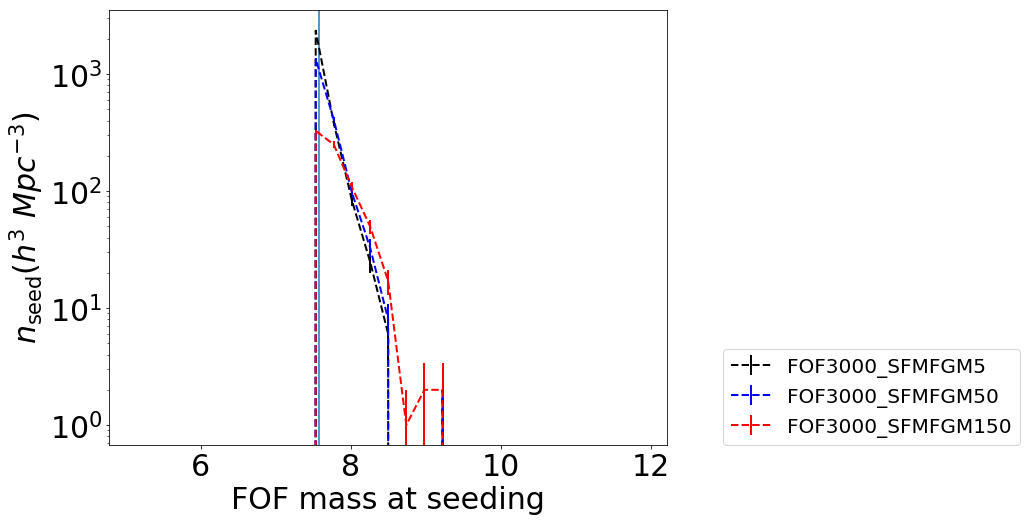

In [20]:
f,axx=plt.subplots(1,1,figsize=(10,8),sharex=True)


ax=axx
nbins=30

redshift_cut=7
text_fontsize=25


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run

run='/L3p125n512/AREPO/' # name of the simulation runs


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_ZOOM_RUNS4/density_and_metallicity_based_criterion_zoom_levelmin7_levelmax11_haloindex4_redshift5.00_logbhseedmass4.10_NSC/AREPO//' # this is the folder containing the simulation run
run='./' # name of the simulation runs
output='output_debug6_test_painted0p5_ratio3000_SFMFGM5/'
basePath=path_to_output+run+output
col='red'
fac=1.
M10,MF10,dMF10=show_seed_FOFmass(basePath,col,labl=r"$M_{seed}=1.95e2 \ M_{\odot}/h$",nbins=nbins,cumulative=0,plot=0)
ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=2,color='black',label='FOF3000_SFMFGM5',linestyle='dashed')

path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_ZOOM_RUNS4/density_and_metallicity_based_criterion_zoom_levelmin7_levelmax11_haloindex4_redshift5.00_logbhseedmass4.10_NSC/AREPO//' # this is the folder containing the simulation run
run='./' # name of the simulation runs
output='output_debug6_test_painted0p5_ratio3000_SFMFGM50/'
basePath=path_to_output+run+output
col='red'
fac=1.
M10,MF10,dMF10=show_seed_FOFmass(basePath,col,labl=r"$M_{seed}=1.95e2 \ M_{\odot}/h$",nbins=nbins,cumulative=0,plot=0)
ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=2,color='blue',label='FOF3000_SFMFGM50',linestyle='dashed')

path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_ZOOM_RUNS4/density_and_metallicity_based_criterion_zoom_levelmin7_levelmax11_haloindex4_redshift5.00_logbhseedmass4.10_NSC/AREPO//' # this is the folder containing the simulation run
run='./' # name of the simulation runs
output='output_debug6_test_painted0p5_ratio3000_SFMFGM150/'
basePath=path_to_output+run+output
col='red'
fac=1.
M10,MF10,dMF10=show_seed_FOFmass(basePath,col,labl=r"$M_{seed}=1.95e2 \ M_{\odot}/h$",nbins=nbins,cumulative=0,plot=0)
ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=2,color='red',label='FOF3000_SFMFGM150',linestyle='dashed')



ax.axvline(numpy.log10(1.25e4*3000))

ax.legend(loc=(1.1,0),fontsize=20)

plt.subplots_adjust(wspace=0,hspace=0)

set_default_fontsizes(axx,'FOF mass at seeding',r'$n_{\mathrm{seed}}(h^3 \ Mpc^{-3})$')

#ax.set_ylim(1,1e5)
ax.set_yscale('log')

plt.subplots_adjust(wspace=0,hspace=0)

#plt.savefig('Seeding_distribution_resolution_convergence.png',bbox_inches='tight')

#-----------------------------------------



No of seeds formed: 3672
No of seeds formed: 20


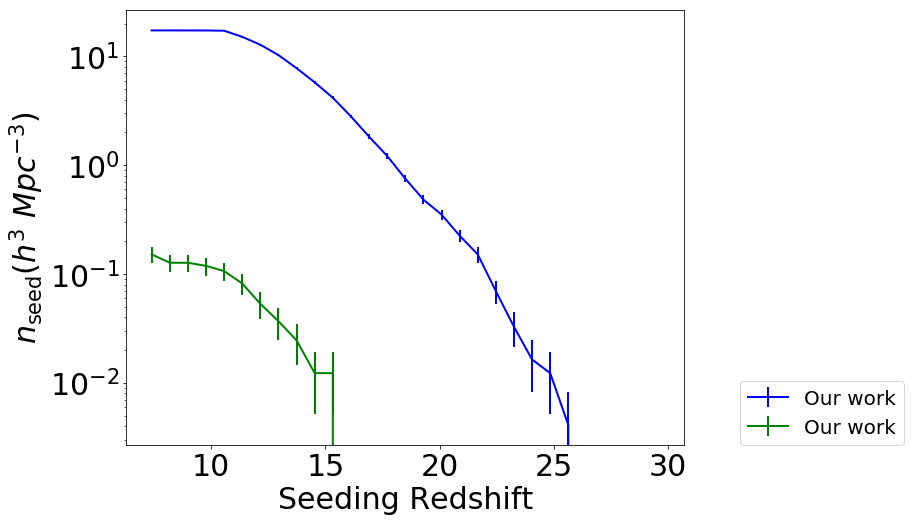

In [15]:
f,axx=plt.subplots(1,1,figsize=(10,8),sharex=True)


ax=axx
nbins=30

redshift_cut=7
text_fontsize=25


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run

run='/L3p125n512/AREPO/' # name of the simulation runs
output='/output_ratio3000_SFMFGM5_seed3.19/'   
basePath=path_to_output+run+output
col='red'
fac=1./6.25**3
M10,MF10,dMF10=show_seeding_histories2(basePath,col,labl=r"$M_{seed}=1.95e2 \ M_{\odot}/h$",nbins=nbins,cumulative=1,plot=0)
ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=2,color='blue',label='Our work')

run='/L3p125n512/AREPO/' # name of the simulation runs
output='/output_ratio3000_SFMFGM5_SFGM3000_seed3.19/'   
basePath=path_to_output+run+output
col='red'
fac=1./6.25**3
M10,MF10,dMF10=show_seeding_histories2(basePath,col,labl=r"$M_{seed}=1.95e2 \ M_{\odot}/h$",nbins=nbins,cumulative=1,plot=0)
ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=2,color='green',label='Our work')








ax.legend(loc=(1.1,0),fontsize=20)

plt.subplots_adjust(wspace=0,hspace=0)

set_default_fontsizes(axx,'Seeding Redshift',r'$n_{\mathrm{seed}}(h^3 \ Mpc^{-3})$')

#ax.set_ylim(1,1e5)
ax.set_yscale('log')

plt.subplots_adjust(wspace=0,hspace=0)

#plt.savefig('Seeding_distribution_resolution_convergence.png',bbox_inches='tight')

#-----------------------------------------



No of seeds formed: 238


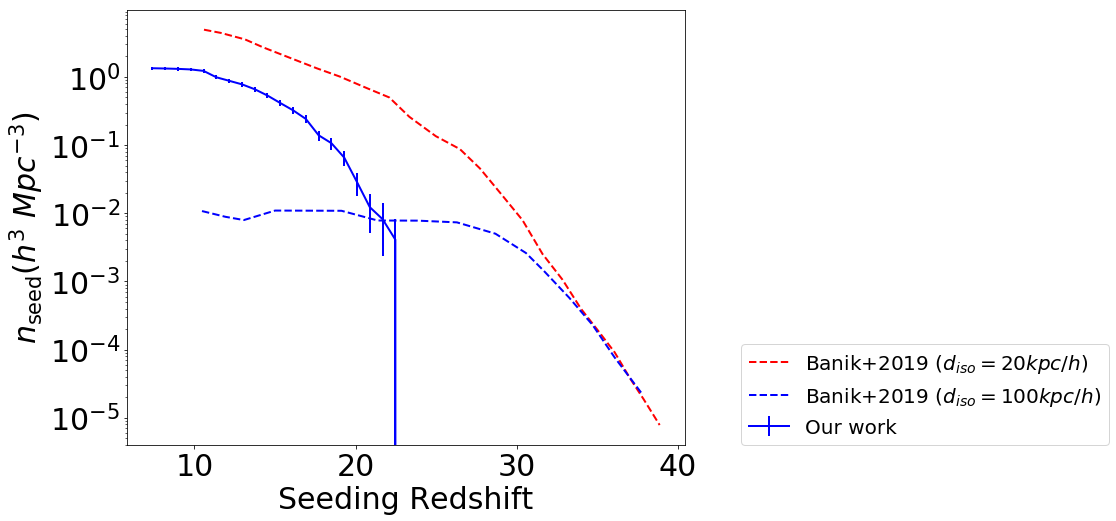

In [11]:
f,axx=plt.subplots(1,1,figsize=(10,8),sharex=True)


ax=axx
nbins=30

redshift_cut=7
text_fontsize=25




#ax.errorbar(redshift_space,N_space2*fac,color='black')



data=numpy.loadtxt('../data_from_papers/seed_density_20.txt')
ax.errorbar(data[:,0],data[:,1],linewidth=2,color='red',linestyle='dashed',label='Banik+2019 ($d_{iso}=20 kpc/h$)')

data=numpy.loadtxt('../data_from_papers/seed_density_100.txt')
ax.errorbar(data[:,0],data[:,1],linewidth=2,color='blue',linestyle='dashed',label='Banik+2019 ($d_{iso}=100 kpc/h$)')



path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run

run='/L6p25n1024/AREPO/' # name of the simulation runs
output='/output_ratio3000_SFMFGM1000_seed3.19/'   
basePath=path_to_output+run+output
col='red'
fac=1./6.25**3
M10,MF10,dMF10=show_seeding_histories2(basePath,col,labl=r"$M_{seed}=1.95e2 \ M_{\odot}/h$",nbins=nbins,cumulative=1,plot=0)
ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=2,color='blue',label='Our work')








ax.legend(loc=(1.1,0),fontsize=20)

plt.subplots_adjust(wspace=0,hspace=0)

set_default_fontsizes(axx,'Seeding Redshift',r'$n_{\mathrm{seed}}(h^3 \ Mpc^{-3})$')

#ax.set_ylim(1,1e5)
ax.set_yscale('log')

plt.subplots_adjust(wspace=0,hspace=0)

#plt.savefig('Seeding_distribution_resolution_convergence.png',bbox_inches='tight')

#-----------------------------------------



/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_107.txt"
  data=numpy.loadtxt(output_path+'blackhole_seeding2/'+name)
/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_427.txt"
  data=numpy.loadtxt(output_path+'blackhole_seeding2/'+name)
/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_274.txt"
  

/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_423.txt"
  data=numpy.loadtxt(output_path+'blackhole_seeding2/'+name)
/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_378.txt"
  data=numpy.loadtxt(output_path+'blackhole_seeding2/'+name)
/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_350.txt"
  

/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_305.txt"
  data=numpy.loadtxt(output_path+'blackhole_seeding2/'+name)
/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_135.txt"
  data=numpy.loadtxt(output_path+'blackhole_seeding2/'+name)
/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_253.txt"
  

/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_16.txt"
  data=numpy.loadtxt(output_path+'blackhole_seeding2/'+name)
/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_318.txt"
  data=numpy.loadtxt(output_path+'blackhole_seeding2/'+name)
/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_352.txt"
  d

/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_356.txt"
  data=numpy.loadtxt(output_path+'blackhole_seeding2/'+name)
/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_29.txt"
  data=numpy.loadtxt(output_path+'blackhole_seeding2/'+name)
/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_285.txt"
  d

/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_175.txt"
  data=numpy.loadtxt(output_path+'blackhole_seeding2/'+name)
/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_124.txt"
  data=numpy.loadtxt(output_path+'blackhole_seeding2/'+name)
/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_446.txt"
  

/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_132.txt"
  data=numpy.loadtxt(output_path+'blackhole_seeding2/'+name)
/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_146.txt"
  data=numpy.loadtxt(output_path+'blackhole_seeding2/'+name)
/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_359.txt"
  

/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_273.txt"
  data=numpy.loadtxt(output_path+'blackhole_seeding2/'+name)
/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_231.txt"
  data=numpy.loadtxt(output_path+'blackhole_seeding2/'+name)
/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_102.txt"
  

/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_267.txt"
  data=numpy.loadtxt(output_path+'blackhole_seeding2/'+name)
/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/arepo_package.py:943: UserWarning: loadtxt: Empty input file: "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS////L3p125n512/AREPO//output_ratio3000_SFMFGM1000_seed3.19/blackhole_seeding2/blackhole_seeding2_52.txt"
  data=numpy.loadtxt(output_path+'blackhole_seeding2/'+name)


No of seeds formed: 21
No of seeds formed: 238


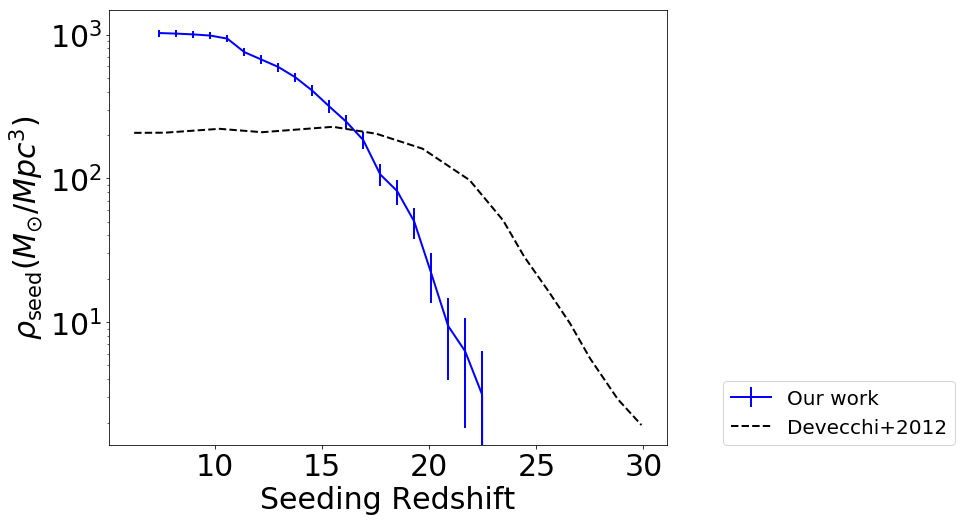

In [8]:
f,axx=plt.subplots(1,1,figsize=(10,8),sharex=True)


ax=axx


hubble=0.7
fac=1.56e3/3.125**3*hubble**2
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
run='/L3p125n512/AREPO/' # name of the simulation runs
output='/output_ratio3000_SFMFGM1000_seed3.19/'   
basePath=path_to_output+run+output
col='green'
M10,MF10,dMF10=show_seeding_histories2(basePath,col,labl=r"$M_{seed}=1.95e2 \ M_{\odot}/h$",nbins=nbins,cumulative=1,plot=0)
#ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=2,color='red',label='Our model (L3p125N512, Msfmp=1000)')



hubble=0.7
fac=1.56e3/6.25**3*hubble**2
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
run='/L6p25n1024/AREPO/' # name of the simulation runs
output='/output_ratio3000_SFMFGM1000_seed3.19/'   
basePath=path_to_output+run+output
col='green'
M10,MF10,dMF10=show_seeding_histories2(basePath,col,labl=r"$M_{seed}=1.95e2 \ M_{\odot}/h$",nbins=nbins,cumulative=1,plot=0)
ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=2,color='blue',label='Our work')


#data=numpy.loadtxt('../data_from_papers/seed_density_20.txt')
#ax.errorbar(data[:,0],data[:,1]*100*hubble**3,linewidth=2,color='red',linestyle='dashed',label='Banik+2019 ($d_{iso}=20 kpc/h$)')

#data=numpy.loadtxt('../data_from_papers/seed_density_100.txt')
#ax.errorbar(data[:,0],data[:,1]*100*hubble**3,linewidth=2,color='blue',linestyle='dashed',label='Banik+2019 ($d_{iso}=100 kpc/h$)')




data=numpy.loadtxt('../data_from_papers/rho_vs_z.txt')
ax.errorbar(data[:,0],data[:,1],linewidth=2,color='black',linestyle='dashed',label='Devecchi+2012')




ax.legend(loc=(1.1,0),fontsize=20)

plt.subplots_adjust(wspace=0,hspace=0)

set_default_fontsizes(axx,'Seeding Redshift',r'$\rho_{\mathrm{seed}}(M_{\odot}/Mpc^3)$')

#ax.set_ylim(1,1e5)
ax.set_yscale('log')

plt.subplots_adjust(wspace=0,hspace=0)

#plt.savefig('Seeding_distribution_resolution_convergence.png',bbox_inches='tight')

#-----------------------------------------



Desired redshift:  7
Output redshift:  7.005417045544533
Output snapshot:  18
Desired redshift:  7
Output redshift:  7.005417045544533
Output snapshot:  18
Efective volume in levelmax 11: 244.140625
[0.0116736 0.019456  0.0544768 0.6264832 0.155648  0.0311296 0.0038912]
Desired redshift:  8
Output redshift:  8.012172948865935
Output snapshot:  17
Desired redshift:  8
Output redshift:  8.012172948865935
Output snapshot:  17
Efective volume in levelmax 11: 244.140625
[0.0038912 0.0038912 0.0272384 0.0505856 0.7276544 0.1478656 0.0116736]
Desired redshift:  9
Output redshift:  9.00233985416247
Output snapshot:  16
Desired redshift:  9
Output redshift:  9.00233985416247
Output snapshot:  16
Efective volume in levelmax 11: 244.140625
[0.0038912 0.0038912 0.0272384 0.856064  0.1128448 0.0116736]
Desired redshift:  10
Output redshift:  9.996590466186332
Output snapshot:  15
Desired redshift:  10
Output redshift:  9.996590466186332
Output snapshot:  15
Efective volume in levelmax 11: 244.14062

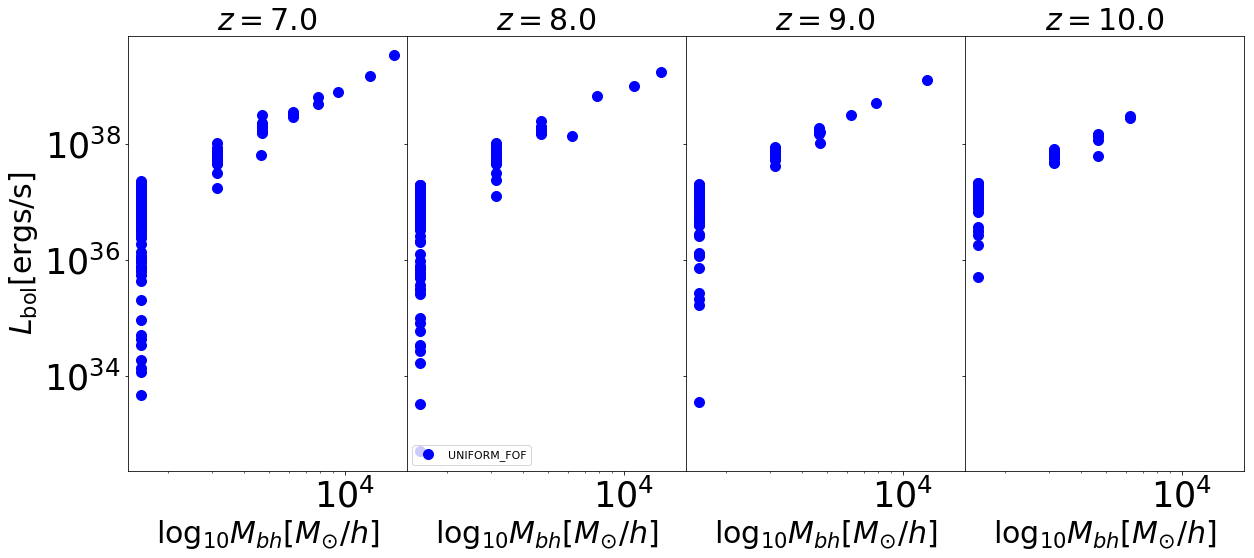

In [9]:
MIN,MAX,NBINS=30,50,20

L_sun=3.826e33
f,axx=plt.subplots(1,4,figsize=(20,8),sharey=True,sharex=True)

#ax.set_title("BH_NEW_CENTERING is 'on'",fontsize=30)

ratio=1000

i=0
for desired_redshift in [7,8,9,10]:

    ax=axx[i]
    ax.set_title('$z=%.1f$'%desired_redshift,fontsize=30)
    
        

    path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
    run='/L6p25n1024/AREPO/' # name of the simulation runs
    output='/output_ratio3000_SFMFGM1000_seed3.19/' 
    basePath=path_to_output+run+output
    om0,oml,hubble=arepo_package.get_cosmology(basePath)

    BH_Mdot,output_redshift=arepo_package.get_particle_property(basePath,'BH_Mdot',5,desired_redshift)
    BH_Mass,output_redshift=arepo_package.get_particle_property(basePath,'BH_Mass',5,desired_redshift)
    BH_Mass*=1e10 
    
    #print()
    ##Luminosities=numpy.array([convert_mdot_to_Lbol(mdot,mass,radiative_efficiency,1) for mdot,mass in zip(BH_Mdot,BH_Mass)])
    Luminosities=BH_Mdot*total_conv
    M,MF,dMF=arepo_package.get_luminosity_function_for_zoom(basePath,11,desired_redshift,Luminosities,MIN,MAX,NBINS,zoom_volume=0)
    mask=(MF>0)&(dMF>0)
    
    
    print(MF[mask])
    
    ax.errorbar(BH_Mass,Luminosities,linewidth=3,marker='o',ms=10,label='UNIFORM_FOF',linestyle=' ',color='blue')

    #print(Luminosities)
   
    
    ax.set_xlabel('$\log_{10} M_{bh}[M_{\odot}/h]$',fontsize=30)
    
    #ax.set_ylabel('$\log_{10} M_{bh}[M_{\odot}/h]$',fontsize=30)
    
    #ax.set_xlim(8e40,1e48)



    #ax.set_ylim(1e-8,1e-0)

    ax.set_xscale('log')
    ax.set_yscale('log')


    ax.tick_params(labelsize=35)
    i+=1
    
    
    
axx[1].legend(loc='lower left',fontsize=11)
axx[0].set_ylabel('$L_{\mathrm{bol}}[\mathrm{ergs/s}]$',fontsize=30)
plt.subplots_adjust(wspace=0)

plt.savefig('./LF_observations_lowz.png',bbox_inches='tight')


Text(0, 0.5, 'Occupation fraction')

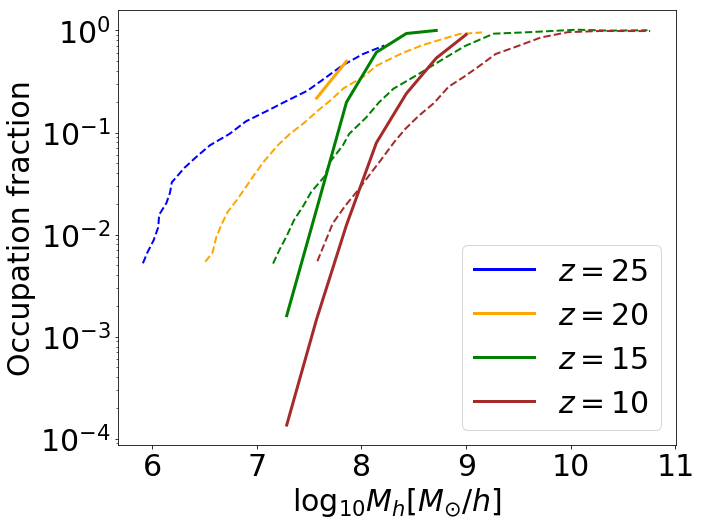

In [10]:
f,ax=plt.subplots(1,1,figsize=(10,8))

log_mass_space=numpy.linspace(5,9,15)
diff=numpy.diff(log_mass_space)[0]

for desired_redshift,col in zip([25,20,15,10],['blue','orange','green','brown']):
    
    path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
    run='/L6p25n1024/AREPO/' # name of the simulation runs
    output='/output_ratio3000_SFMFGM1000_seed3.19/'
    basePath=path_to_output+run+output    
    GroupMass,o=arepo_package.get_group_property(basePath,'GroupMass',desired_redshift)
    GroupMass=GroupMass*1e10
    GroupLenType,o=arepo_package.get_group_property(basePath,'GroupLenType',desired_redshift)
    GroupBHLen=GroupLenType[:,5]
    occ_frac_space=[]
    for mass_cen in log_mass_space:
        mask=(GroupMass>10**(mass_cen-diff/2))&(GroupMass<10**(mass_cen+diff/2))
        mask_bh=GroupBHLen>0
        #print(GroupMass[mask])
        occ_frac_space.append(float(len(GroupMass[mask&mask_bh]))/(float(len(GroupMass[mask]))+0.000001))
    occ_frac_space=numpy.array(occ_frac_space)
    mm=occ_frac_space>0
    ax.errorbar(log_mass_space[mm],occ_frac_space[mm],label='$z=%d$'%desired_redshift,color=col,linewidth=3)
 
    ax.tick_params(labelsize=30)
    
    data=numpy.loadtxt('../data_from_papers/BH_occ_fraction_z%d.txt'%desired_redshift)
    ax.errorbar(data[:,0],data[:,1],linewidth=2,color=col,linestyle='dashed')



ax.set_yscale('log')

ax.legend(loc='lower right',fontsize=30)
ax.set_xlabel('$\log_{10}M_h[M_{\odot}/h]$',fontsize=30)
ax.set_ylabel('Occupation fraction',fontsize=30)
        
        
    
    
    
    

Efective volume in levelmax 11: 244.140625
[0.0038912 0.038912  0.1439744 0.29184   0.2684928 0.0311296]
Efective volume in levelmax 11: 244.140625
[0.0038912 0.0038912 0.0233472 0.0505856 0.7237632 0.1478656 0.0116736]
Efective volume in levelmax 11: 244.140625
[0.0544768 0.1712128 0.3930112 0.2295808 0.0155648]
Efective volume in levelmax 11: 244.140625
[0.0038912 0.0038912 0.0272384 0.8521728 0.1128448 0.0116736]


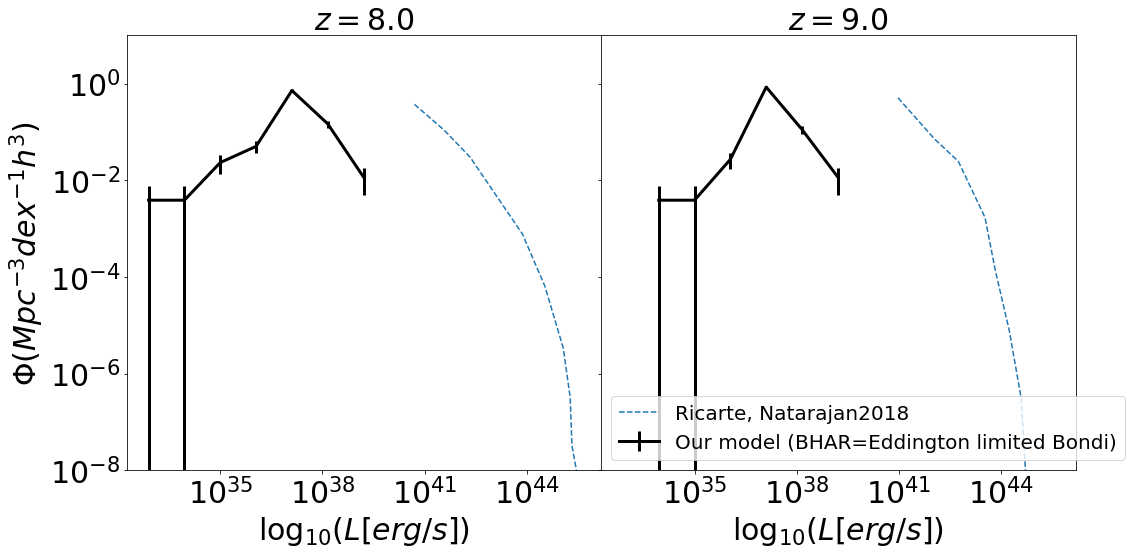

In [7]:
MIN,MAX,NBINS=30,50,20

L_sun=3.826e33
f,axx=plt.subplots(1,2,figsize=(17,8),sharey=True,sharex=True)

#ax.set_title("BH_NEW_CENTERING is 'on'",fontsize=30)

SFR_BHAR_unit_conversion=1./1e10*1e9*0.978/1000

ratio=1000

i=0
for desired_redshift in [8,9]:

    ax=axx[i]
    ax.set_title('$z=%.1f$'%desired_redshift,fontsize=30)
    
    
     

    path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
    run='/L6p25n1024/AREPO/' # name of the simulation runs
    output='/output_ratio3000_SFMFGM1000_seed3.19/' 
    basePath=path_to_output+run+output
    om0,oml,hubble=arepo_package.get_cosmology(basePath)

    BH_Mdot,output_redshift=arepo_package.get_subhalo_property(basePath,'SubhaloSFR',desired_redshift)
    BH_Mass,output_redshift=arepo_package.get_subhalo_property(basePath,'SubhaloBHMass',desired_redshift)
    maskk=BH_Mass>0
    
    Luminosities=BH_Mdot[maskk]*total_conv*SFR_BHAR_unit_conversion

    M,MF,dMF=arepo_package.get_luminosity_function_for_zoom(basePath,11,desired_redshift,Luminosities,MIN,MAX,NBINS,zoom_volume=0)
    mask=(MF>0)&(dMF>0)
    
    
    print(MF[mask])
    
    
    #ax.errorbar(M[mask],MF[mask],dMF[mask],linewidth=3,marker=' ',ms=10,label='Our model (BHAR=SFR/1000)',linestyle='solid',color='blue')

    
    
    path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
    run='/L6p25n1024/AREPO/' # name of the simulation runs
    output='/output_ratio3000_SFMFGM1000_seed3.19/' 
    basePath=path_to_output+run+output
    om0,oml,hubble=arepo_package.get_cosmology(basePath)

    BH_Mdot,output_redshift=arepo_package.get_subhalo_property(basePath,'SubhaloBHMdot',desired_redshift)
    BH_Mass,output_redshift=arepo_package.get_subhalo_property(basePath,'SubhaloBHMass',desired_redshift)
    maskk=BH_Mass>0
    
    Luminosities=BH_Mdot[maskk]*total_conv

    M,MF,dMF=arepo_package.get_luminosity_function_for_zoom(basePath,11,desired_redshift,Luminosities,MIN,MAX,NBINS,zoom_volume=0)
    mask=(MF>0)&(dMF>0)
    
    
    print(MF[mask])
    
    
    ax.errorbar(M[mask],MF[mask],dMF[mask],linewidth=3,marker=' ',ms=10,label='Our model (BHAR=Eddington limited Bondi)',linestyle='solid',color='black')

    
    
    
    
    
    
    ax.set_xlabel('$\log_{10} (L[erg/s])$',fontsize=30)
    
    #ax.set_xlim(8e40,1e48)



    ax.set_ylim(1e-8,1e1)

    ax.set_xscale('log')
    ax.set_yscale('log')


    ax.tick_params(labelsize=30)
    i+=1
    
data=numpy.loadtxt('./obs_data/LF_z8.txt')
axx[0].plot(data[:,0]*L_sun,data[:,1],linestyle='dashed')


data=numpy.loadtxt('./obs_data/LF_z9.txt')
axx[1].plot(data[:,0]*L_sun,data[:,1],linestyle='dashed',label='Ricarte, Natarajan2018')
    
    
axx[1].legend(loc='lower left',fontsize=20)
axx[0].set_ylabel('$\Phi(Mpc^{-3}dex^{-1} h^3)$',fontsize=30)
plt.subplots_adjust(wspace=0)

plt.savefig('./LF_observations_lowz.png',bbox_inches='tight')


No of seeds formed: 238
No of seeds formed: 2


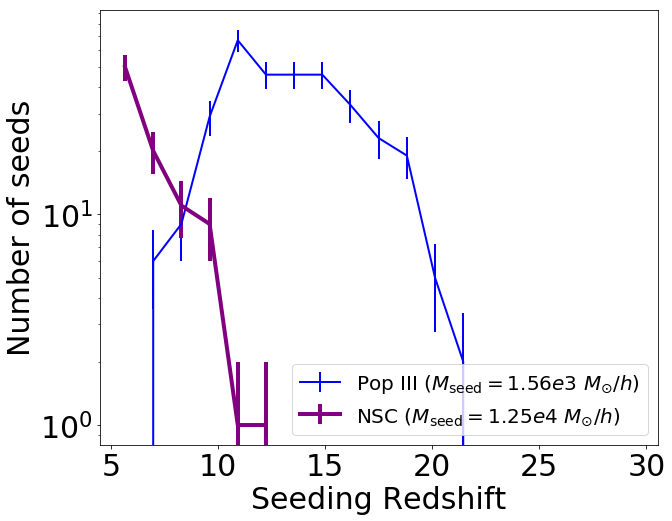

In [56]:
f,axx=plt.subplots(1,1,figsize=(10,8),sharex=True)


ax=axx
nbins=20

redshift_cut=5
text_fontsize=25


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run

path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
run='/L6p25n1024/AREPO/' # name of the simulation runs
output='/output_ratio3000_SFMFGM1000_seed3.19/' 
basePath=path_to_output+run+output

col='red'
fac=1
M10,MF10,dMF10=show_seeding_histories2(basePath,col,labl=r"$M_{seed}=1.95e2 \ M_{\odot}/h$",nbins=nbins,cumulative=0,plot=0)
ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=2,color='blue',label='Pop III ($M_{\mathrm{seed}}=1.56e3 \ M_{\odot}/h$)')

path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
run='/L6p25n512/AREPO/' # name of the simulation runs
output='/output_ratio10000_SFMFGM5_SFGM3000_Z1_seed4.10/' 
basePath=path_to_output+run+output
col='red'
fac=1
M10,MF10,dMF10=show_seeding_histories2(basePath,col,labl='Pop III ($M_{\mathrm{seed}}=1.56e3 \ M_{\odot/h}$)',nbins=nbins,cumulative=0,plot=0)
ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=4,color='purple',label='NSC ($M_{\mathrm{seed}}=1.25e4 \ M_{\odot}/h$)')








ax.legend(loc='lower right',fontsize=20)

plt.subplots_adjust(wspace=0,hspace=0)

set_default_fontsizes(axx,'Seeding Redshift','Number of seeds')

#ax.set_ylim(1,1e5)
ax.set_yscale('log')


plt.subplots_adjust(wspace=0,hspace=0)

plt.savefig('Paper3_figures/seed_Formation_time.png',bbox_inches='tight')

#-----------------------------------------



No of seeds formed: 238
No of seeds formed: 2


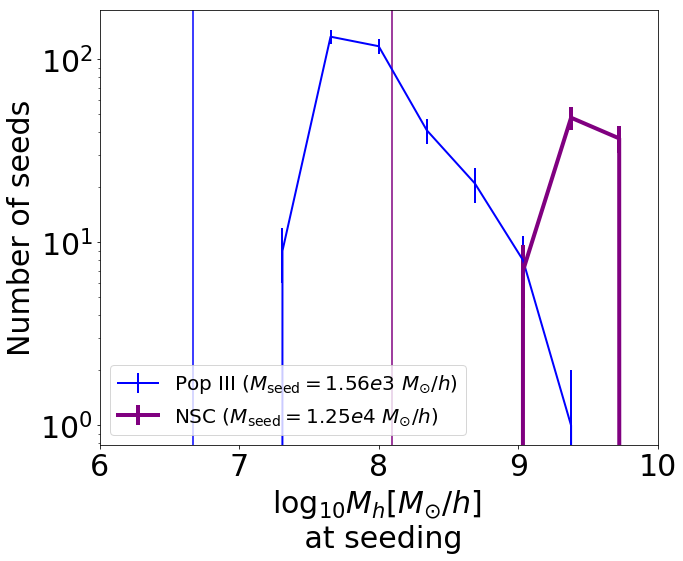

In [58]:
f,axx=plt.subplots(1,1,figsize=(10,8),sharex=True)


ax=axx
nbins=30

redshift_cut=5
text_fontsize=25


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
run='/L6p25n1024/AREPO/' # name of the simulation runs
output='/output_ratio3000_SFMFGM1000_seed3.19/'   
basePath=path_to_output+run+output
col='blue'
fac=1
M10,MF10,dMF10=show_seed_FOFmass(basePath,col,labl=r"$M_{seed}=1.95e2 \ M_{\odot}/h$",nbins=nbins,cumulative=0,plot=0)
ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=2,color='blue',label='Pop III ($M_{\mathrm{seed}}=1.56e3 \ M_{\odot}/h$)',linestyle='solid')



path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
run='/L6p25n512/AREPO/' # name of the simulation runs
output='/output_ratio10000_SFMFGM5_SFGM3000_Z1_seed4.10/' 
basePath=path_to_output+run+output
col='purple'
fac=1
M10,MF10,dMF10=show_seed_FOFmass(basePath,col,labl=r"$M_{seed}=1.95e2 \ M_{\odot}/h$",nbins=nbins,cumulative=0,plot=0)
ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=4,color='purple',label='NSC ($M_{\mathrm{seed}}=1.25e4 \ M_{\odot}/h$)')




ax.axvline(numpy.log10(1.56e3*3000),color='blue')

ax.axvline(numpy.log10(1.25e4*10000),color='purple')


ax.legend(fontsize=20,loc='lower left')

plt.subplots_adjust(wspace=0,hspace=0)

set_default_fontsizes(axx,'$\log_{10}M_h[M_{\odot}/h]$ \n at seeding','Number of seeds')

ax.set_xlim(6,10)
ax.set_yscale('log')

plt.subplots_adjust(wspace=0,hspace=0)


plt.savefig('Peper3',bbox_inches='tight')

plt.savefig('Paper3_figures/seed_halo_mass.png',bbox_inches='tight')


#plt.savefig('Seeding_distribution_resolution_convergence.png',bbox_inches='tight')

#-----------------------------------------



In [4]:
def get_merger_distributions(basePath,nbins,min_value,max_value,mass_cut,linear=0,HDF5=0,path_to_hdf5='./'):
    if(HDF5):
        fobj=h5py.File(path_to_hdf5)
        scale_fac_complete_sorted=fobj.get('time')[:]
        primary_mass_sorted=fobj.get('mass_out')[:]
        secondary_mass_sorted=fobj.get('mass_in')[:]
    else:
        scale_fac_complete_sorted,primary_mass_sorted,secondary_mass_sorted,primary_id_sorted,secondary_id_sorted,file_id_complete_sorted,N_empty=arepo_package.get_merger_events_from_snapshot(basePath,upto_redshift,HOSTS=0)
    mass_ratio=secondary_mass_sorted/primary_mass_sorted
    #print(mass_ratio[mass_ratio>1.])
        #print(primary_mass_sorted,secondary_mass_sorted)
    merger_redshifts=1./scale_fac_complete_sorted-1.
    
    #print(merger_redshifts)
    
    #print("###",primary_mass_sorted)
    mask_primary=primary_mass_sorted>=mass_cut/1e10
    mask_secondary=secondary_mass_sorted>=mass_cut/1e10
    mask_total_mass=(primary_mass_sorted+secondary_mass_sorted)>total_mass_cut/1e10
    mask_redshift=merger_redshifts>=redshift_cut
    mask_ratio_cut=mass_ratio>=mass_ratio_cut
    mask=((mask_primary&mask_secondary)&(mask_redshift&mask_ratio_cut))&mask_total_mass
    merger_redshifts=merger_redshifts[mask]
  
    #print("!!!",merger_redshifts)
    bins, dist, dist_err,norm,counts_sum=arepo_package.get_probability_density(merger_redshifts,nbins,min_value,max_value,linear=linear)
 
    dist*=counts_sum

    dist_err*=counts_sum
    dt=numpy.array([T(zz-norm/2,zz+norm/2) for zz in bins])
    

    dz=numpy.diff(bins)[0]
    #print("!!!",dist)    
    dz_dt=numpy.array([dz/T(zz-dz/2,zz+dz/2) for zz in bins])
    
    return bins,dist,dist_err,norm,dz_dt


def get_merger_distributions_hosts(basePath,nbins,min_value,max_value,mass_cut,linear=0,HDF5=0,path_to_hdf5='./'):
    if(HDF5):
        fobj=h5py.File(path_to_hdf5)
        scale_fac_complete_sorted=fobj.get('time')[:]
        primary_mass_sorted=fobj.get('mass_out')[:]
        secondary_mass_sorted=fobj.get('mass_in')[:]
    else:
        scale_fac_complete,BH_id_primary,BH_mass_primary,hosthalomass_primary,hosthalostellarmass_primary,hosthalogasmass_primary,hosthalodmmass_primary,BH_id_secondary,BH_mass_secondary,hosthalomass_secondary,hosthalostellarmass_secondary,hosthalogasmass_secondary,hosthalodmmass_secondary,file_id_complete=arepo_package.get_merger_events_hosts(basePath,HDF5=1)        #print(primary_mass_sorted,secondary_mass_sorted)
    mass_ratio=BH_id_secondary/BH_mass_primary
    mask_ratio_cut=mass_ratio>mass_ratio_cut
    merger_redshifts=1./scale_fac_complete-1.
    #print("###",BH_mass_primary)
    mask_primary=BH_mass_primary>mass_cut/1e10
    mask_secondary=BH_mass_secondary>mass_cut/1e10
    mask_total_mass=(BH_mass_primary+BH_mass_secondary)>total_mass_cut/1e10
    mask_redshift=merger_redshifts>redshift_cut
    mask=((mask_primary&mask_secondary)&(mask_redshift&mask_ratio_cut))&mask_total_mass
    
    maskhost1=hosthalomass_primary+hosthalomass_secondary>14.2e10/1e10*h
    maskhost2=hosthalomass_primary>7.1e10/1e10*h
    maskhost3=hosthalodmmass_primary>2e9/1e10*h
    maskhost4=hosthalodmmass_secondary>2e9/1e10*h
    maskhost5=hosthalostellarmass_primary>1e8/1e10*h   
    maskhost6=hosthalostellarmass_secondary>1e8/1e10*h
    
    if(apply_host_cuts==0):
        maskhost=mask
    else:
        maskhost=((((maskhost1&maskhost2)&maskhost3)&maskhost4)&maskhost5)&maskhost6
    
    
    merger_redshifts=merger_redshifts[mask&maskhost]
    
    #print("!!!",merger_redshifts)
    
    bins, dist, dist_err,norm,counts_sum=arepo_package.get_probability_density(merger_redshifts,nbins,min_value,max_value,linear=linear)
    
    dt=numpy.array([T(zz-norm/2,zz+norm/2) for zz in bins])
     
    
    dz=numpy.diff(bins)[0]
    #print("!!!",dist)
    dz_dt=numpy.array([dz/T(zz-dz/2,zz+dz/2) for zz in bins])
    
    return bins,dist,dist_err,norm,dz_dt

def get_merger_rate(basePath, nbins, min_value,max_value,ZOOM=0,HDF5=0,input_simulation_boxsize_in_Mpch=1.,path_to_hdf5='.',GasFractionCut=0.1,hosts=0):
    Mpc_to_kpc=1000
    if (hosts):
        bins,dist,dist_err,norm,dz_dt=get_merger_distributions_hosts(basePath,nbins,min_value,max_value,mass_cut,linear=1,HDF5=HDF5,path_to_hdf5=path_to_hdf5)
    else:
        bins,dist,dist_err,norm,dz_dt=get_merger_distributions(basePath,nbins,min_value,max_value,mass_cut,linear=1,HDF5=HDF5,path_to_hdf5=path_to_hdf5)
    volume_of_redshift_shell=numpy.array([4*3.14*DC(0,z_bin)**2*dx_dz(z_bin) for z_bin in bins])
    if ZOOM:
        if (HDF5):
            simulation_volume=input_simulation_boxsize_in_Mpch**3
        else:
            output_redshifts,high_res_volumes,total_volumes=numpy.load(basePath+'/zoom_volumes_high_res_fraction_cut_%.2f.npy'%(GasFractionCut),allow_pickle=True)
            #print(output_redshifts,high_res_volumes)
            mask=high_res_volumes>0 
            get_volume=scipy.interpolate.interp1d(output_redshifts[mask],high_res_volumes[mask],fill_value='extrapolate')
            simulation_volume=get_volume(bins)
            print("Simulation volumes are:", simulation_volume)
    else:
        if (HDF5):
            simulation_volume=input_simulation_boxsize_in_Mpch**3
        else:
            simulation_volume=(arepo_package.get_box_size(basePath)/Mpc_to_kpc)**3
            print("Simulation volumes are:", simulation_volume)
        
    
    merger_rate=dist*1.
    merger_rate_err=dist_err*1
    
    merger_rate*=dz_dt
    merger_rate_err*=dz_dt
    
    merger_rate/=simulation_volume
    merger_rate_err/=simulation_volume

    merger_rate*=volume_of_redshift_shell
    merger_rate_err*=volume_of_redshift_shell
    
    merger_rate/=(1+bins)
    merger_rate_err/=(1+bins)

    return bins, dist, dist_err, merger_rate, merger_rate_err 







18 7.005417045544533
Total number of mergers 90
Simulation volumes are: 244.140625
18 7.005417045544533
Total number of mergers 95
Simulation volumes are: 244.140625
18 7.005417045544533
Total number of mergers 1
Simulation volumes are: 244.140625


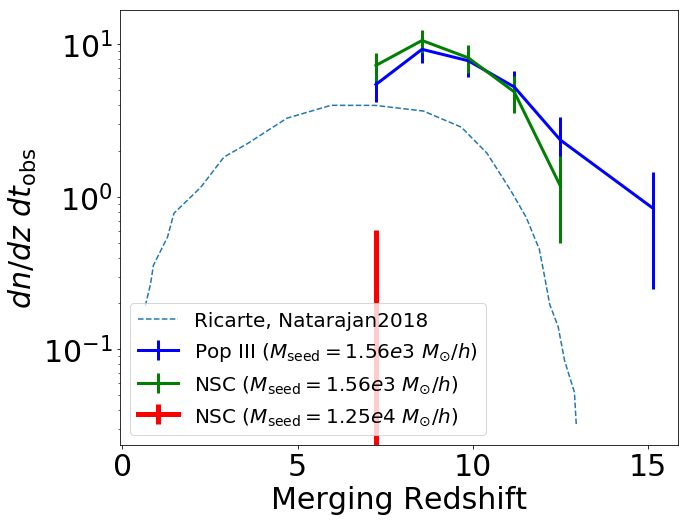

In [7]:
redshift_cut=5
mass_cut=0
mass_ratio_cut=0
total_mass_cut=1e3
apply_host_cuts=0
HDF5=0
ZOOM=1

nbins=20
min_value=0
max_value=25

upto_redshift=5
f,axx=plt.subplots(1,1,figsize=(10,8),sharey=True,sharex=True)

ratio=3000

i=0
HDF5=1
for levelmax,logseedmass in zip([9],[5.9]):
    ax=axx
    i+=1
    path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
    run='/L6p25n1024/AREPO/' # name of the simulation runs
    output='/output_ratio3000_SFMFGM1000_seed3.19/' 
    basePath=path_to_output+run+output
    bins, dist, dist_err, merger_rate, merger_rate_err = get_merger_rate(basePath, nbins, min_value,max_value,ZOOM=0,HDF5=0,input_simulation_boxsize_in_Mpch=1.,path_to_hdf5='.',GasFractionCut=0.1,hosts=0)
    mask=dist>0
    ax.errorbar(bins[mask],merger_rate[mask],merger_rate_err[mask],label='Pop III ($M_{\mathrm{seed}}=1.56e3 \ M_{\odot}/h$)',linewidth=3,color='blue')


    
    path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
    run='/L6p25n1024/AREPO/' # name of the simulation runs
    output='/output_ratio10000_SFMFGM5_SFGM3000_Z1_seed3.19/' 
    basePath=path_to_output+run+output
    bins, dist, dist_err, merger_rate, merger_rate_err = get_merger_rate(basePath, nbins, min_value,max_value,ZOOM=0,HDF5=0,input_simulation_boxsize_in_Mpch=1.,path_to_hdf5='.',GasFractionCut=0.1,hosts=0)
    mask=dist>0
    ax.errorbar(bins[mask],merger_rate[mask],merger_rate_err[mask],label='NSC ($M_{\mathrm{seed}}=1.56e3 \ M_{\odot}/h$)',linewidth=3,color='green')

    
    
    
    #path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
    #run='/L3p125n512/AREPO/' # name of the simulation runs
    #output='/output_ratio10000_SFMFGM5_SFGM3000_seed3.19/' 
    #output='/output_ratio3000_SFMFGM1000_seed3.19/'
    #basePath=path_to_output+run+output
    #bins, dist, dist_err, merger_rate, merger_rate_err = get_merger_rate(basePath, nbins, min_value,max_value,ZOOM=0,HDF5=0,input_simulation_boxsize_in_Mpch=1.,path_to_hdf5='.',GasFractionCut=0.1,hosts=0)
    #ask=dist>0
    #ax.errorbar(bins[mask],merger_rate[mask],merger_rate_err[mask],label='NSC seed ($M_{\mathrm{seed}}=1.25e4 \ M_{\odot/h}$)',linewidth=5,color='orangered')

    
    path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
    run='/L6p25n1024/AREPO/' # name of the simulation runs # name of the simulation runs
    output='/output_ratio10000_SFMFGM5_SFGM3000_Z1_seed4.10/'   
    basePath=path_to_output+run+output    
    
    bins, dist, dist_err, merger_rate, merger_rate_err = get_merger_rate(basePath, nbins, min_value,max_value,ZOOM=0,HDF5=0,input_simulation_boxsize_in_Mpch=1.,path_to_hdf5='.',GasFractionCut=0.1,hosts=0)
    mask=dist>0
    ax.errorbar(bins[mask],merger_rate[mask],merger_rate_err[mask],label='NSC ($M_{\mathrm{seed}}=1.25e4 \ M_{\odot}/h$)',linewidth=5,color='red')



    #ax.errorbar(bins[mask],dist[mask],dist_err[mask],label="levelmax=10",linewidth=3,color='orange')
 
    ax.set_xlabel('Merging Redshift',fontsize=30)
    ax.set_yscale('log')
    ax.tick_params(labelsize=30)


data=numpy.loadtxt('./obs_data/merger_rate.txt')
axx.plot(data[:,0],data[:,1]/4,linestyle='dashed',label='Ricarte, Natarajan2018')
    
axx.legend(loc='lower left',fontsize=20)
#



axx.set_ylabel('$dn /dz \ dt_{\mathrm{obs}}$',fontsize=30)






plt.subplots_adjust(wspace=0)

plt.savefig('Paper3_figures/Merger_rates.png',bbox_inches='tight')



No of seeds formed: 238
No of seeds formed: 212
No of seeds formed: 1


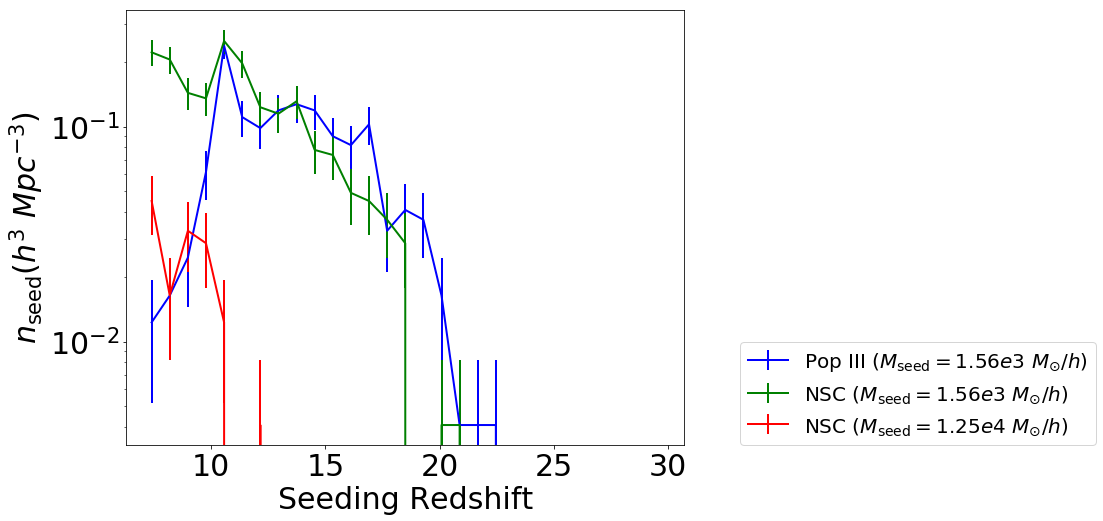

In [3]:
f,axx=plt.subplots(1,1,figsize=(10,8),sharex=True)


ax=axx
nbins=30

redshift_cut=7
text_fontsize=25


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run

run='/L6p25n1024/AREPO/' # name of the simulation runs
output='/output_ratio3000_SFMFGM1000_seed3.19/'   
basePath=path_to_output+run+output
col='red'
fac=1./6.25**3
M10,MF10,dMF10=show_seeding_histories2(basePath,col,labl='.',nbins=nbins,cumulative=0,plot=0)
ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=2,color='blue',label='Pop III ($M_{\mathrm{seed}}=1.56e3 \ M_{\odot}/h$)')



run='/L6p25n1024/AREPO/' # name of the simulation runs
output='/output_ratio10000_SFMFGM5_SFGM3000_Z1_seed3.19/'   
basePath=path_to_output+run+output
col='red'
fac=1./6.25**3
M10,MF10,dMF10=show_seeding_histories2(basePath,col,labl=r"$M_{seed}=1.95e2 \ M_{\odot}/h$",nbins=nbins,cumulative=0,plot=0)
ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=2,color='green',label='NSC ($M_{\mathrm{seed}}=1.56e3 \ M_{\odot}/h$)')



path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
run='/L6p25n1024/AREPO/' # name of the simulation runs # name of the simulation runs

output='/output_ratio10000_SFMFGM5_SFGM3000_Z1_seed4.10/'   
basePath=path_to_output+run+output
col='red'
fac=1./6.25**3
M10,MF10,dMF10=show_seeding_histories2(basePath,col,labl=r"$M_{seed}=1.95e2 \ M_{\odot}/h$",nbins=nbins,cumulative=0,plot=0)
ax.errorbar(M10,MF10*fac,dMF10*fac,linewidth=2,color='red',label='NSC ($M_{\mathrm{seed}}=1.25e4 \ M_{\odot}/h$)')







ax.legend(loc=(1.1,0),fontsize=20)

plt.subplots_adjust(wspace=0,hspace=0)

set_default_fontsizes(axx,'Seeding Redshift',r'$n_{\mathrm{seed}}(h^3 \ Mpc^{-3})$')

#ax.set_ylim(1,1e5)
ax.set_yscale('log')

plt.subplots_adjust(wspace=0,hspace=0)

#plt.savefig('Seeding_distribution_resolution_convergence.png',bbox_inches='tight')

#-----------------------------------------



<ErrorbarContainer object of 3 artists>

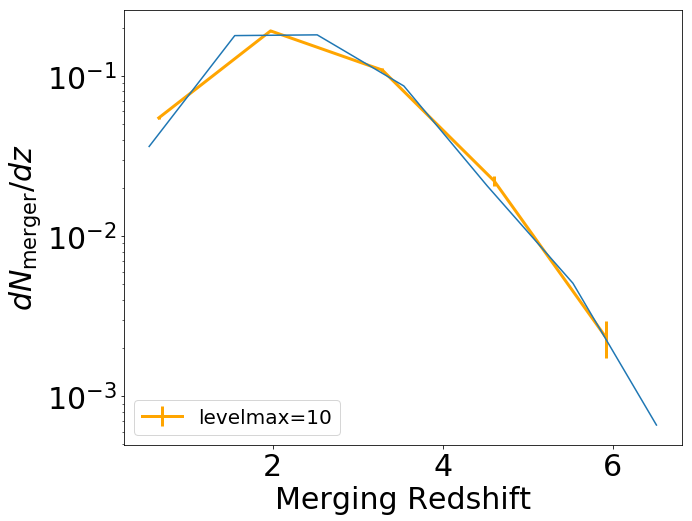

In [5]:
path_to_Illustris='/orange/lblecha/lblecha/Illustris/L75n1820FP/postprocessing/released/blackhole_mergers.hdf5'

redshift_cut=0
mass_cut=1e6
mass_ratio_cut=0
total_mass_cut=0
apply_host_cuts=0
HDF5=0
ZOOM=0

nbins=20
min_value=0
max_value=25

upto_redshift=0
f,axx=plt.subplots(1,1,figsize=(10,8),sharey=True,sharex=True)

ratio=3000

i=0
HDF5=1
for levelmax,logseedmass in zip([9],[5.9]):
    ax=axx
    i+=1
    path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
    run='/L6p25n1024/AREPO/' # name of the simulation runs
    output='/output_ratio3000_SFMFGM1000_seed3.19/' 
    basePath=path_to_output+run+output
    #bins, dist, dist_err,norm,dz_dt = get_merger_distributions(basePath,nbins,min_value,max_value,mass_cut,linear=1,HDF5=0,path_to_hdf5='./')
    
    bins, dist, dist_err, merger_rate, merger_rate_err = get_merger_rate(basePath, nbins, min_value,max_value,ZOOM=0,HDF5=1,input_simulation_boxsize_in_Mpch=75.,path_to_hdf5=path_to_Illustris,GasFractionCut=0,hosts=0)

    
    
    mask=dist>0
    ax.errorbar(bins[mask],merger_rate[mask],merger_rate_err[mask],label="levelmax=10",linewidth=3,color='orange')

    #ax.errorbar(bins[mask],dist[mask],dist_err[mask],label="levelmax=10",linewidth=3,color='orange')
 
    ax.set_xlabel('Merging Redshift',fontsize=30)
    ax.set_yscale('log')
    ax.tick_params(labelsize=30)


axx.legend(loc='lower left',fontsize=20)

axx.set_ylabel('$dN_{\mathrm{merger}}/dz$',fontsize=30)
plt.subplots_adjust(wspace=0)


data=numpy.loadtxt('../arepo_code_development/digitized_data/Laura_proposal_illustris_merger_rates.txt')
axx.errorbar(data[:,0],data[:,1])





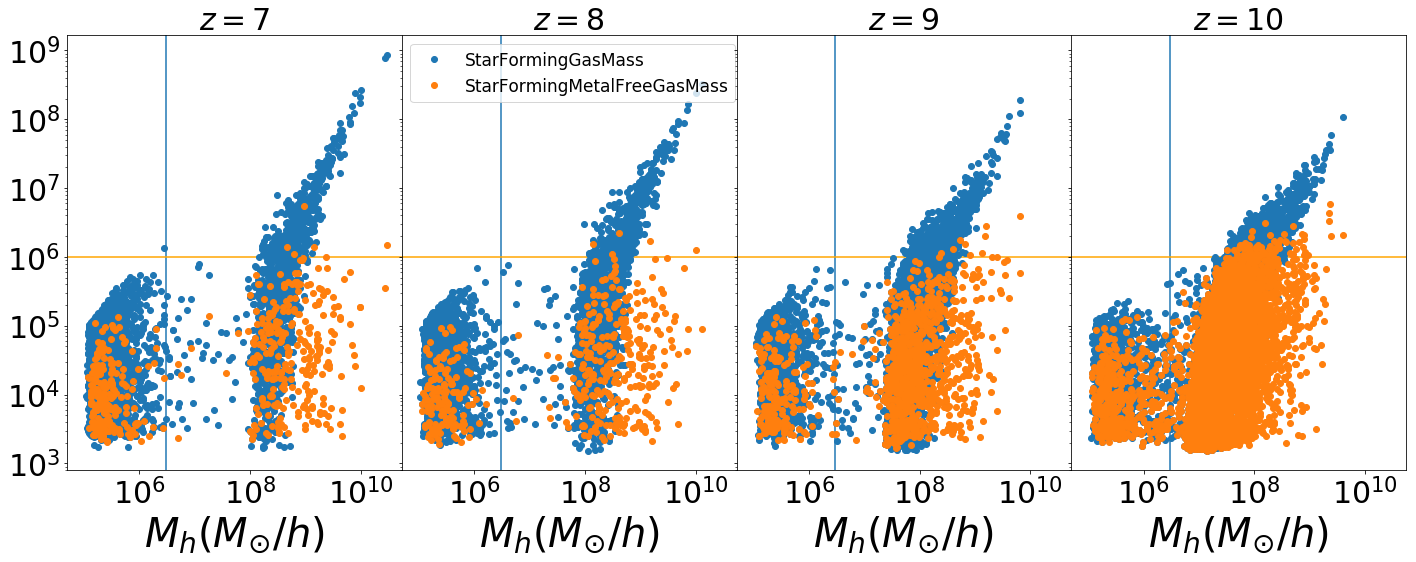

In [53]:
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
run='/L6p25n1024/AREPO/' # name of the simulation runs
output='/output_ratio3000_SFMFGM1000_seed3.19/' 
basePath=path_to_output+run+output

f,axx=plt.subplots(1,4,figsize=(24,8),sharey=True,sharex=True)
i=0
for desired_redshift in [7,8,9,10]:
    axx[i].set_title('$z=%d$'%desired_redshift,fontsize=30)
    
    GroupMass,o=arepo_package.get_group_property(basePath,'GroupMass',desired_redshift)
    GroupStarFormingGasMass,o=arepo_package.get_group_property(basePath,'GroupStarFormingGasMass',desired_redshift)

    GroupStarFormingMetalFreeGasMass,o=arepo_package.get_group_property(basePath,'GroupStarFormingMetalFreeGasMass',desired_redshift)

    axx[i].errorbar(GroupMass*1e10,GroupStarFormingGasMass*1e10,marker='o',linewidth=0,label='StarFormingGasMass')
    axx[i].errorbar(GroupMass*1e10,GroupStarFormingMetalFreeGasMass*1e10,marker='o',linewidth=0,label='StarFormingMetalFreeGasMass')

    axx[i].set_xscale('log')
    axx[i].set_yscale('log')
    
    axx[i].tick_params(labelsize=30)
    
    axx[i].axvline(3000*1e3)
    
    axx[i].axhline(1000*1e3,color='orange')
    
    axx[i].set_xlabel('$M_h(M_{\odot}/h)$',fontsize=40)
    
    i+=1
    
axx[1].legend(loc='upper left',fontsize=17)
#axx[0].set_xlabel('$M_{}(M_{\odot}/h)$',fontsize=40)
plt.subplots_adjust(wspace=0)



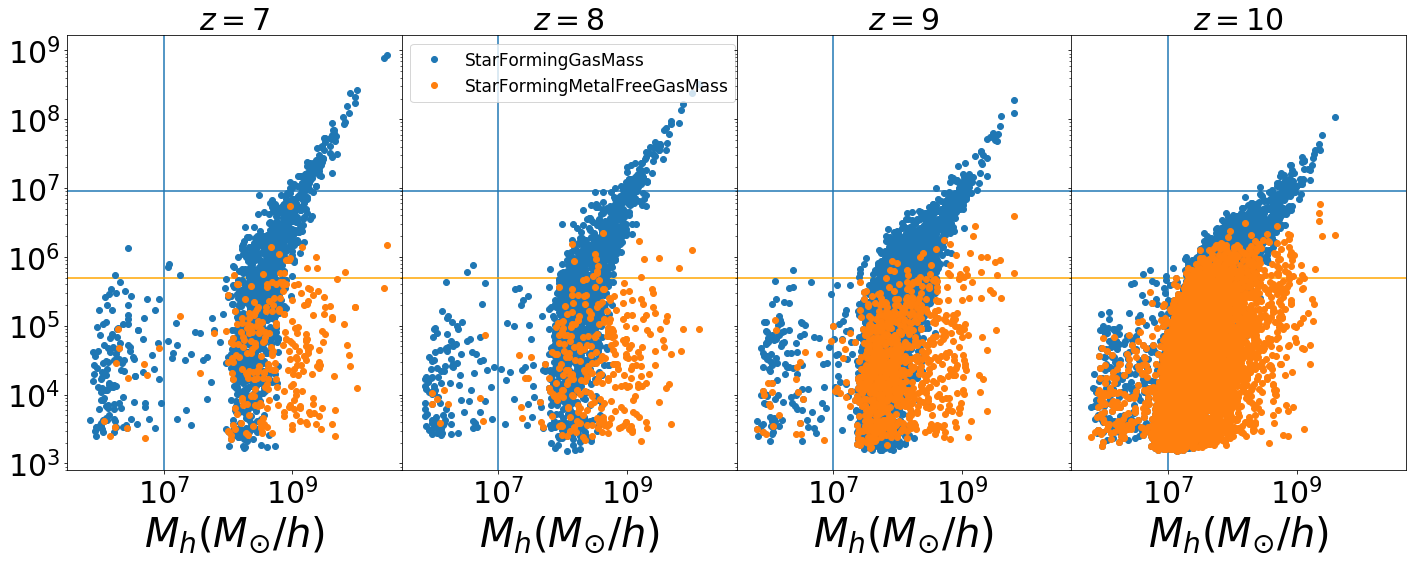

In [52]:
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
run='/L6p25n1024/AREPO/' # name of the simulation runs
output='/output_ratio3000_SFMFGM1000_seed3.19/' 
basePath=path_to_output+run+output

f,axx=plt.subplots(1,4,figsize=(24,8),sharey=True,sharex=True)
i=0
for desired_redshift in [7,8,9,10]:
    axx[i].set_title('$z=%d$'%desired_redshift,fontsize=30)

    GroupMass,o=arepo_package.get_group_property(basePath,'GroupMass',desired_redshift)

    GroupLenType,o=arepo_package.get_group_property(basePath,'GroupLenType',desired_redshift)
    GroupMassType,o=arepo_package.get_group_property(basePath,'GroupMassType',desired_redshift)

    GroupDMLen=GroupLenType[:,1]
    
    GroupGasratio=GroupMassType[:,0]/(GroupMassType[:,0]+GroupMassType[:,1])
    
    
    mask=GroupDMLen>32
    
    
    GroupStarFormingGasMass,o=arepo_package.get_group_property(basePath,'GroupStarFormingGasMass',desired_redshift)

    GroupStarFormingMetalFreeGasMass,o=arepo_package.get_group_property(basePath,'GroupStarFormingMetalFreeGasMass',desired_redshift)

    axx[i].errorbar(GroupMass[mask]*1e10,GroupStarFormingGasMass[mask]*1e10,marker='o',linewidth=0,label='StarFormingGasMass')
    axx[i].errorbar(GroupMass[mask]*1e10,GroupStarFormingMetalFreeGasMass[mask]*1e10,marker='o',linewidth=0,label='StarFormingMetalFreeGasMass')

    axx[i].set_xscale('log')
    axx[i].set_yscale('log')
    
    axx[i].tick_params(labelsize=30)
    
    axx[i].axvline(10000*1e3)
    
    axx[i].axhline(9000*1e3)
    
    axx[i].axhline(10000*50,color='orange')
    
    
    axx[i].set_xlabel('$M_h(M_{\odot}/h)$',fontsize=40)
    
    i+=1
    
axx[1].legend(loc='upper left',fontsize=17)
#axx[0].set_xlabel('$M_{}(M_{\odot}/h)$',fontsize=40)
plt.subplots_adjust(wspace=0)

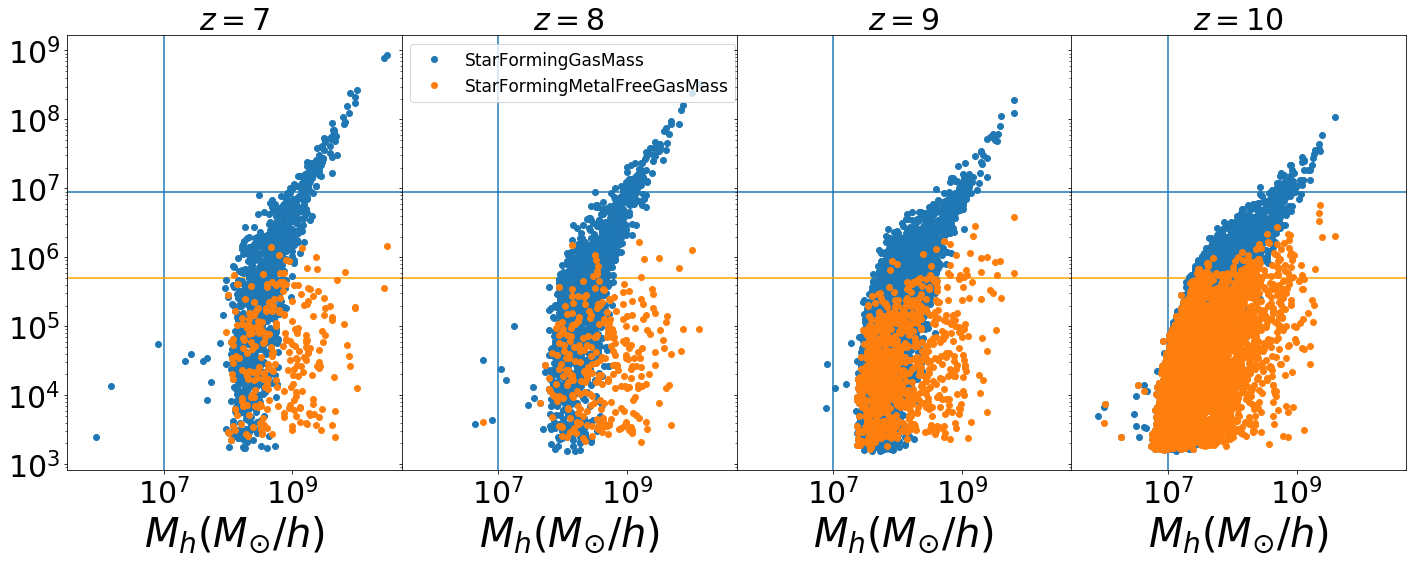

In [51]:
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
run='/L6p25n1024/AREPO/' # name of the simulation runs
output='/output_ratio3000_SFMFGM1000_seed3.19/' 
basePath=path_to_output+run+output

f,axx=plt.subplots(1,4,figsize=(24,8),sharey=True,sharex=True)
i=0
for desired_redshift in [7,8,9,10]:
    axx[i].set_title('$z=%d$'%desired_redshift,fontsize=30)

    GroupMass,o=arepo_package.get_group_property(basePath,'GroupMass',desired_redshift)

    GroupLenType,o=arepo_package.get_group_property(basePath,'GroupLenType',desired_redshift)
    GroupMassType,o=arepo_package.get_group_property(basePath,'GroupMassType',desired_redshift)

    GroupDMLen=GroupLenType[:,1]
    
    GroupGasratio=GroupMassType[:,0]/(GroupMassType[:,0]+GroupMassType[:,1])
    
    
    mask=(GroupDMLen>32)&(GroupGasratio<0.1)

    
    
    GroupStarFormingGasMass,o=arepo_package.get_group_property(basePath,'GroupStarFormingGasMass',desired_redshift)

    GroupStarFormingMetalFreeGasMass,o=arepo_package.get_group_property(basePath,'GroupStarFormingMetalFreeGasMass',desired_redshift)

    axx[i].errorbar(GroupMass[mask]*1e10,GroupStarFormingGasMass[mask]*1e10,marker='o',linewidth=0,label='StarFormingGasMass')
    axx[i].errorbar(GroupMass[mask]*1e10,GroupStarFormingMetalFreeGasMass[mask]*1e10,marker='o',linewidth=0,label='StarFormingMetalFreeGasMass')

    axx[i].set_xscale('log')
    axx[i].set_yscale('log')
    
    axx[i].tick_params(labelsize=30)
    
    axx[i].axvline(10000*1e3)
    
    axx[i].axhline(9000*1e3)
    
    axx[i].axhline(10000*50,color='orange')
    
    
    axx[i].set_xlabel('$M_h(M_{\odot}/h)$',fontsize=40)
    
    i+=1
    
axx[1].legend(loc='upper left',fontsize=17)
#axx[0].set_xlabel('$M_{}(M_{\odot}/h)$',fontsize=40)
plt.subplots_adjust(wspace=0)

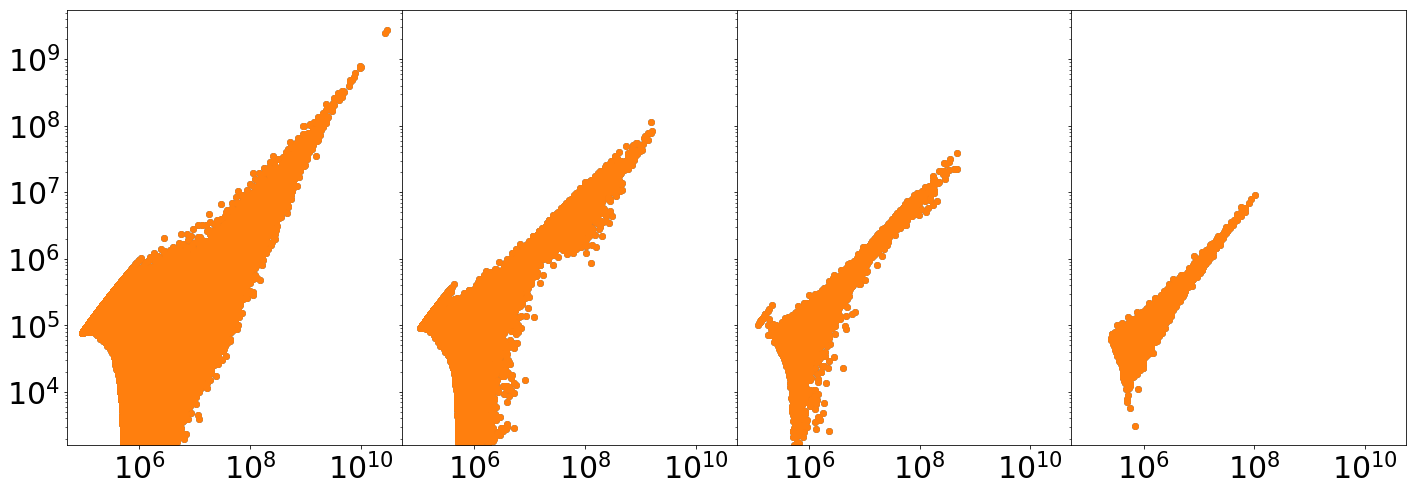

In [19]:
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
run='/L6p25n1024/AREPO/' # name of the simulation runs
output='/output_ratio3000_SFMFGM1000_seed3.19/' 
basePath=path_to_output+run+output

f,axx=plt.subplots(1,4,figsize=(24,8),sharey=True,sharex=True)
i=0
for desired_redshift in [7,11,15,19]:
    GroupMass,o=arepo_package.get_group_property(basePath,'GroupMass',desired_redshift)
    GroupMassType,o=arepo_package.get_group_property(basePath,'GroupMassType',desired_redshift)
    GroupSM=GroupMassType[:,0]
    axx[i].errorbar(GroupMass*1e10,GroupSM*1e10,marker='o',linewidth=0)
    axx[i].errorbar(GroupMass*1e10,GroupSM*1e10,marker='o',linewidth=0)

    axx[i].set_xscale('log')
    axx[i].set_yscale('log')
    
    axx[i].tick_params(labelsize=30)
    
    i+=1
plt.subplots_adjust(wspace=0)



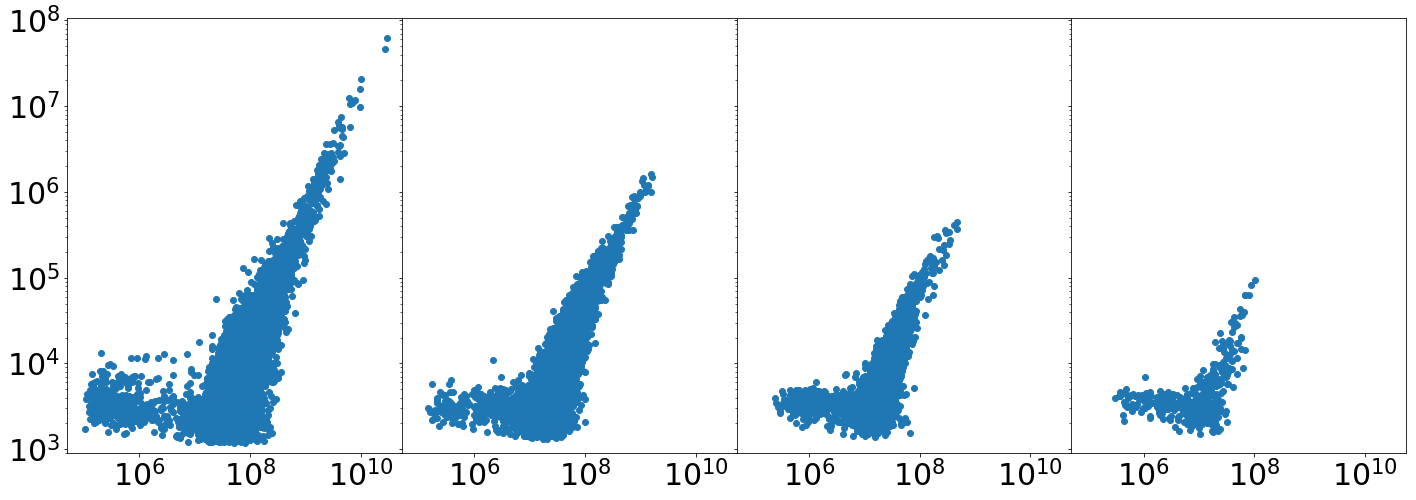

In [22]:
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
run='/L6p25n1024/AREPO/' # name of the simulation runs
output='/output_ratio3000_SFMFGM1000_seed3.19/' 
basePath=path_to_output+run+output

f,axx=plt.subplots(1,4,figsize=(24,8),sharey=True,sharex=True)
i=0
for desired_redshift in [7,11,15,19]:
    GroupMass,o=arepo_package.get_group_property(basePath,'GroupMass',desired_redshift)
    GroupMassType,o=arepo_package.get_group_property(basePath,'GroupMassType',desired_redshift)
    GroupSM=GroupMassType[:,4]
    axx[i].errorbar(GroupMass*1e10,GroupSM*1e10,marker='o',linewidth=0)
    #axx[i].errorbar(GroupMass*1e10,GroupSM*1e10,marker='o',linewidth=0)

    axx[i].set_xscale('log')
    axx[i].set_yscale('log')
    
    axx[i].tick_params(labelsize=30)
    
    i+=1
plt.subplots_adjust(wspace=0)



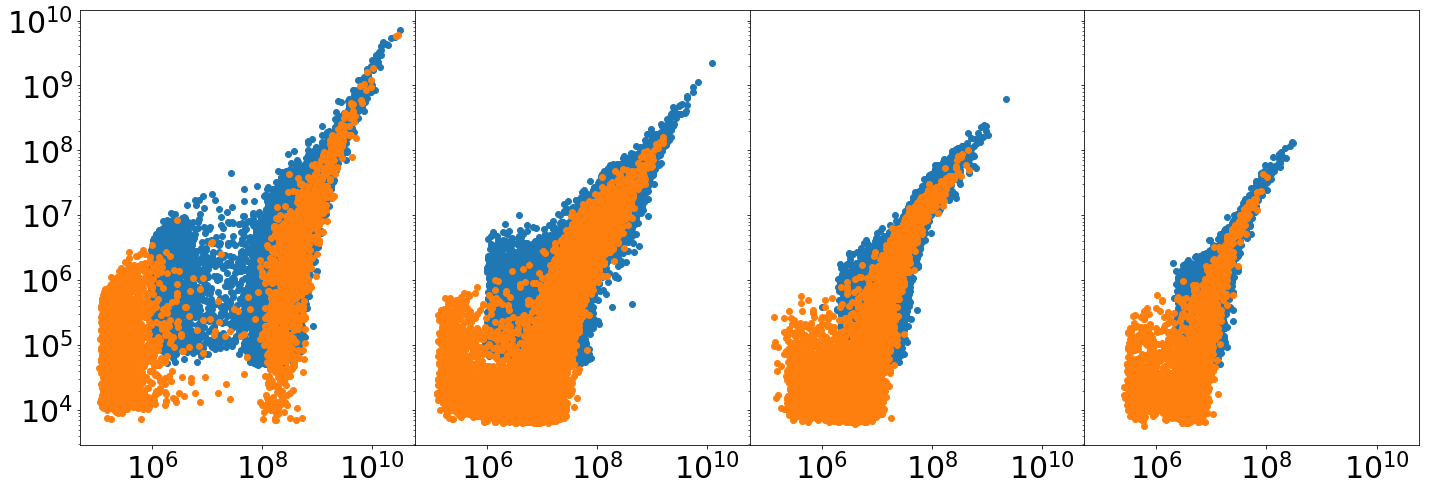

In [30]:

path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
run='/L12p5n1024/AREPO/' # name of the simulation runs
output='/output_ratio3000_SFMFGM5_seed5.00/' 
basePath=path_to_output+run+output

f,axx=plt.subplots(1,4,figsize=(24,8),sharey=True,sharex=True)
i=0
for desired_redshift in [7,11,15,19]:
    GroupMass,o=arepo_package.get_group_property(basePath,'GroupMass',desired_redshift)
    GroupSFR,o=arepo_package.get_group_property(basePath,'GroupSFR',desired_redshift)

    axx[i].errorbar(GroupMass*1e10,GroupSFR*1e10,marker='o',linewidth=0)
    #axx[i].errorbar(GroupMass*1e10,GroupSFR*1e10,marker='o',linewidth=0)

    axx[i].set_xscale('log')
    axx[i].set_yscale('log')
    
    axx[i].tick_params(labelsize=30)
    
    i+=1
plt.subplots_adjust(wspace=0)

path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
run='/L6p25n1024/AREPO/' # name of the simulation runs
output='/output_ratio3000_SFMFGM1000_seed3.19/' 
basePath=path_to_output+run+output

#f,axx=plt.subplots(1,4,figsize=(24,8),sharey=True,sharex=True)
i=0
for desired_redshift in [7,11,15,19]:
    GroupMass,o=arepo_package.get_group_property(basePath,'GroupMass',desired_redshift)
    GroupSFR,o=arepo_package.get_group_property(basePath,'GroupSFR',desired_redshift)

    axx[i].errorbar(GroupMass*1e10,GroupSFR*1e10,marker='o',linewidth=0)
    #axx[i].errorbar(GroupMass*1e10,GroupSFR*1e10,marker='o',linewidth=0)

    axx[i].set_xscale('log')
    axx[i].set_yscale('log')
    
    axx[i].tick_params(labelsize=30)
    
    i+=1
plt.subplots_adjust(wspace=0)







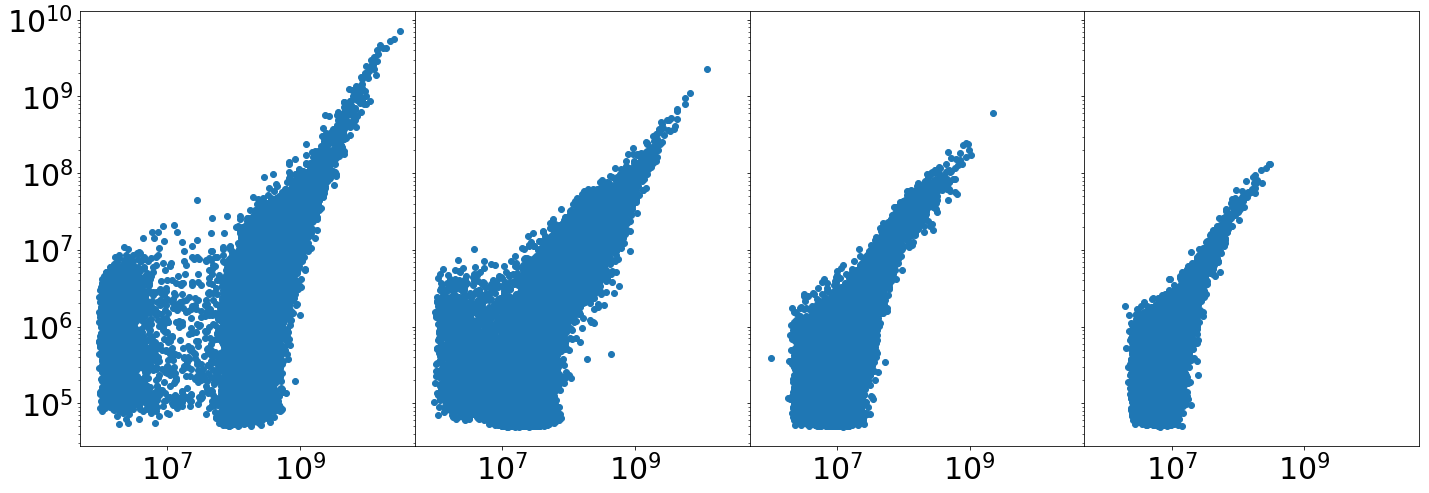

In [25]:
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
run='/L12p5n1024/AREPO/' # name of the simulation runs
output='/output_ratio3000_SFMFGM5_seed5.00/' 
basePath=path_to_output+run+output

f,axx=plt.subplots(1,4,figsize=(24,8),sharey=True,sharex=True)
i=0
for desired_redshift in [7,11,15,19]:
    GroupMass,o=arepo_package.get_group_property(basePath,'GroupMass',desired_redshift)
    GroupSFR,o=arepo_package.get_group_property(basePath,'GroupSFR',desired_redshift)

    axx[i].errorbar(GroupMass*1e10,GroupSFR*1e10,marker='o',linewidth=0)
    #axx[i].errorbar(GroupMass*1e10,GroupSFR*1e10,marker='o',linewidth=0)

    axx[i].set_xscale('log')
    axx[i].set_yscale('log')
    
    axx[i].tick_params(labelsize=30)
    
    i+=1
plt.subplots_adjust(wspace=0)
